<p class="pull-left">
ANLT 212 - Analytics Computing
</p>
<div class="pull-right">
<ul class="list-inline">
Copyright © Dana Nehoran 2017
</ul>
</div>

<div style="background-color: #A378AF; border:1px solid #000; margin-left: 2px; margin-right: 2px; 
padding-bottom: 2px; padding-left: 2px; padding-right: 1px; padding-top: 10px;">
<center><b><font size="6">Group Project 2 - Python Project</font></b></center>
</div>

Student Names:

Qingnan (Gina) Zeng

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 1:</b> Project Definition</blockquote> 

Select a dataset from the UCI Machine Learning Repository 
http://archive.ics.uci.edu/ml/datasets.html
Your dataset should be different from the one utilized on project 1. 

Describe your stakeholder. Who is the potential sponsor of your project? For example: a real estate investor, the police department, a city mayor, etc. Explain what is the objective of this project and its justification. What are the findings so far, and what is your objective.

Note: <br>
If you want to select a dataset from a different public repository, you can.


<b><font color="blue", size = 4>a)</font> Data Selection</b>: Explain why this data was selected. What are the overall characteristics of the data.

<span style="background-color: #FFFF00">Your answer here</span>

The data set refers to clients of a **wholesale distributor** in Lisbon, Portugal. It includes the annual spending in monetary units on diverse product categories. It could be studied and analysed for marketing and management purposes. 
<br>
<br>
There are eight number of attributes including:
- Channels (Horeca and Retail),
- Regions (Lisbon, Oporto and other Region),
- and different categories of wholesale products including fresh products, milk products, grocery products, frozen products, detergents & paper products and delicatessen products. <br>
<br>
Among those data, Channels and Regions are categorical data, while all other products data are continous data.

<b><font color="blue", size = 4>b)</font> Stakeholder</b>: Describe your stakeholder. Who is the potential sponsor of your project? For example: a real estate investor, the police department, a city mayor, etc. 

<span style="background-color: #FFFF00">Your answer here</span>

The potential sponsor of this project is the wholesale distributor's owner. He would like to know, according to their shopping habits, how could all his customers be categorized into different types. So that it enables him to target at different groups of customers using specific approach to maximum the profit.

<b><font color="blue", size = 4>c)</font> Objective</b>: Project objective, justification, expected outcome. How your results may impact your stake holders. Which decisions or changes will the stakeholder be able to make based on this project

<span style="background-color: #FFFF00">Your answer here</span>

The objective of this project is to categorize wholesale customers into different groups based on their spending behaviors. The results will help my stakeholder -- the owner of this wholesale distributor knows better about his customers' shopping behavior, so that he could make marketing strategies and decisions based on that.

<b><font color="blue", size = 4>d)</font> Background Research</b>: List here all other studies related to clustering published with the same dataset, and how your proposed study is different from them.

If no other clustering studies were conducted with the same dataset, you should specify: "No other studies available"

<span style="background-color: #FFFF00">Your answer here</span>

I only found and looked at [one of the studies](https://www.slideshare.net/d0g0/cluster-analysis-wholesale-customers-data-set) done on this dataset.<br>
I am thinking about using different approaches like categorize the customers in the largest cluster further into more specific groups. Also I will try different ways of categorying the data and see if the outcome could be more accurate.

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 2:</b> Exploratory Data Analysis</blockquote> 

Create some exploratory analysis on your data using core Python functions and visualizations. Cluster the information into different groups to explore the possibilities for your proposed project. Summarize your data and conduct some statistics. Explain your findings in English.

<b><font color="blue", size = 4>a)</font> Data Summary</b>: Show summary information of the different variables. Select the columns you are interested in. Explain each column, its range and purpose

<span style="background-color: #FFFF00">Your answer here</span>

In [1]:
import pandas as pd
import numpy as np

In [2]:
d = pd.read_csv("Wholesale customers data.csv")

In [3]:
print(d['Channel'].value_counts())

1    298
2    142
Name: Channel, dtype: int64


In [4]:
print(d['Region'].value_counts())

3    316
1     77
2     47
Name: Region, dtype: int64


In [5]:
d[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


- For columns Channel, which is categorical data, in the summary we can see there are 298 Horeca (catering industry) customers and 142 retail customers.
- Region is also categorical data which shows the majority customers (316) are from other regions while 77 are from Lisbon and 47 are from Oporto.
- The total population of this datasets are 440 rows which represents 440 customers.
- According to mean value of different product types, customers spend most on Fresh and Grocery products.

<b><font color="blue", size = 4>b)</font> Data Cleaning</b>: Clean the data, removing rows and columns that have no useful information or no information at all

<span style="background-color: #FFFF00">Your answer here</span>

Since first two clumns represents categorical data, I will rename them into words:

In [6]:
d['Channel'] = d['Channel'].replace({1: 'Catering Industry', 2: 'Retail Customer'})

In [7]:
print(d['Channel'].value_counts())

Catering Industry    298
Retail Customer      142
Name: Channel, dtype: int64


In [8]:
d['Region'] = d['Region'].replace({1: 'Lisbon', 2: 'Oporto', 3: 'Other Region'})

In [9]:
print(d['Region'].value_counts())

Other Region    316
Lisbon           77
Oporto           47
Name: Region, dtype: int64


In [10]:
d.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail Customer,Other Region,12669,9656,7561,214,2674,1338
1,Retail Customer,Other Region,7057,9810,9568,1762,3293,1776
2,Retail Customer,Other Region,6353,8808,7684,2405,3516,7844
3,Catering Industry,Other Region,13265,1196,4221,6404,507,1788
4,Retail Customer,Other Region,22615,5410,7198,3915,1777,5185


In [11]:
d.describe(include = "all")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Catering Industry,Other Region,NaN,NaN,NaN,NaN,NaN,NaN
freq,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


<b><font color="blue", size = 4>c)</font> Adaptation</b>: Create at least two additional columns that are necessary for your study. They can be calculated columns or aggregated columns.

<span style="background-color: #FFFF00">Your answer here</span>

In [12]:
d["Total Spending"] = d.Fresh + d.Milk + d.Grocery + d.Frozen + d.Detergents_Paper + d.Delicassen

In [13]:
d.loc[d["Total Spending"] >= 40000, "Major Customer"] = True
d.loc[d["Total Spending"] < 40000, "Major Customer"] = False

In [14]:
print(d['Major Customer'].value_counts())

False    328
True     112
Name: Major Customer, dtype: int64


In [15]:
d.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total Spending,Major Customer
0,Retail Customer,Other Region,12669,9656,7561,214,2674,1338,34112,False
1,Retail Customer,Other Region,7057,9810,9568,1762,3293,1776,33266,False
2,Retail Customer,Other Region,6353,8808,7684,2405,3516,7844,36610,False
3,Catering Industry,Other Region,13265,1196,4221,6404,507,1788,27381,False
4,Retail Customer,Other Region,22615,5410,7198,3915,1777,5185,46100,True


In [16]:
d.describe(include = "all")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total Spending,Major Customer
count,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440
unique,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Catering Industry,Other Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,298,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328
mean,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364,NaN
std,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730,NaN
min,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000,NaN
25%,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000,NaN
50%,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000,NaN
75%,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000,NaN


<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 3:</b> Visualization with MatPlotLib</blockquote> 

<b><font color="blue", size = 4>a)</font> Descriptive Analytics</b>: Create at least 5 different (unique) visualizations that show different aspects of your data related to the research object of your project

<span style="background-color: #FFFF00">Your answer here</span>

In [17]:
import matplotlib.pyplot as plt

- Calulate the total amount of all product types this wholesale distributor has so that we know what tpye of products sells the most:

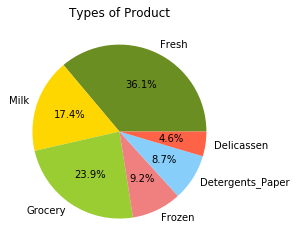

In [18]:
sum_Fresh = sum(d.Fresh)
sum_Milk = sum(d.Milk)
sum_Grocery = sum(d.Grocery)
sum_Frozen = sum(d.Frozen)
sum_Detergents_Paper = sum(d.Detergents_Paper)
sum_Delicassen = sum(d.Delicassen)
labels = 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'
sizes = [sum_Fresh, sum_Milk, sum_Grocery, sum_Frozen, sum_Detergents_Paper, sum_Delicassen]
colors = ['olivedrab', 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'tomato']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Types of Product")
plt.show()

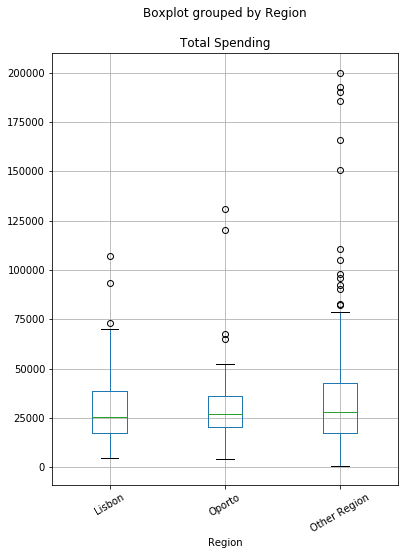

In [19]:
d.boxplot('Total Spending','Region',rot = 30,figsize=(6,8))

In [20]:
print(sum(d.Fresh[d.Channel == "Catering Industry"]))
print(sum(d.Fresh[d.Channel == "Retail Customer"]))

4015717
1264414


In [21]:
print(sum(d.Milk[d.Channel == "Catering Industry"]))
print(sum(d.Milk[d.Channel == "Retail Customer"]))

1028614
1521743


In [22]:
print(sum(d.Grocery[d.Channel == "Catering Industry"]))
print(sum(d.Grocery[d.Channel == "Retail Customer"]))

1180717
2317845


In [23]:
print(sum(d.Frozen[d.Channel == "Catering Industry"]))
print(sum(d.Frozen[d.Channel == "Retail Customer"]))

1116979
234671


In [24]:
print(sum(d.Detergents_Paper[d.Channel == "Catering Industry"]))
print(sum(d.Detergents_Paper[d.Channel == "Retail Customer"]))

235587
1032270


In [25]:
print(sum(d.Delicassen[d.Channel == "Catering Industry"]))
print(sum(d.Delicassen[d.Channel == "Retail Customer"]))

421955
248988


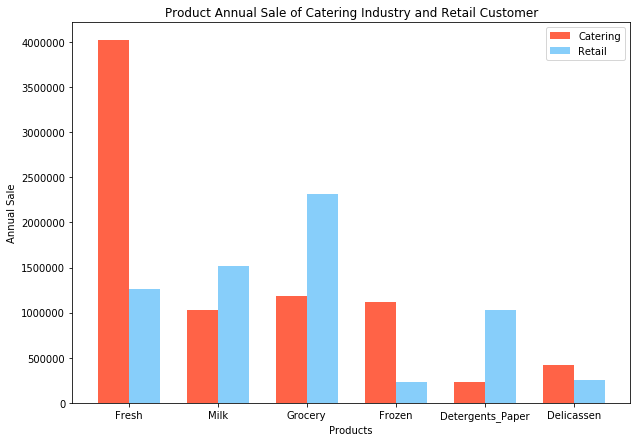

In [26]:
n_groups = 6
sum_catering = (4015717, 1028614, 1180717, 1116979, 235587, 421955)
sum_retail = (1264414, 1521743, 2317845, 234671, 1032270, 248988)
fig, ax = plt.subplots(figsize=(10, 7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1
rects1 = plt.bar(index, sum_catering, bar_width, alpha = opacity, color='tomato', label='Catering')
rects2 = plt.bar(index + bar_width, sum_retail, bar_width, alpha = opacity, color='lightskyblue', label='Retail')
plt.xlabel('Products')
plt.ylabel('Annual Sale')
plt.title('Product Annual Sale of Catering Industry and Retail Customer')
plt.xticks(index + (bar_width * 0.5), ('Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'))
plt.legend()
plt.show()

In [27]:
import seaborn as sns

In [28]:
d_product = d[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]]

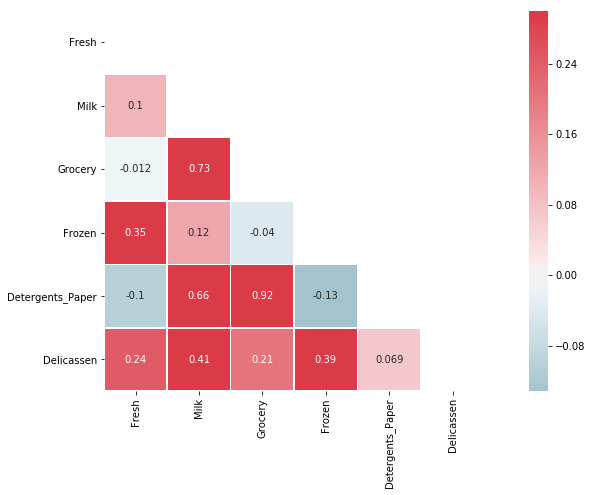

In [29]:
corr = d_product.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax=.3, center=0, square = True, linewidths=.5, annot = True)

In [30]:
from mpl_toolkits.mplot3d import Axes3D

In [31]:
d_catering = d[d.Channel == "Catering Industry"]

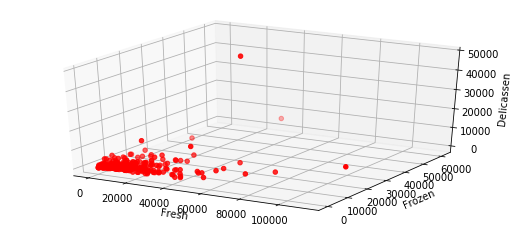

In [32]:
fig = plt.figure(figsize = (9, 4))
ax = fig.add_subplot(111, projection = '3d')
x = d_catering.Fresh
y = d_catering.Frozen
z = d_catering.Delicassen
ax.scatter(x, y, z, c = 'r', marker = 'o')

ax.set_xlabel('Fresh')
ax.set_ylabel('Frozen')
ax.set_zlabel('Delicassen')

plt.show()

<b><font color="blue", size = 4>b)</font> Outcome</b>: Explain in words the outcome of your descriptive analysis

<span style="background-color: #FFFF00">Your answer here</span>

- First pie chart shows the percentages of different product types in annual sales. We can see that Fresh product is the mojor selling product type, which holds 36.1% of total sale.
- Second boxplot shows distribution of different regions. Among them, customers who spend over 75000 are mainly from other regions. The company is having least customers from Oparto.
- Third bar chart shows comparision of customer consumption between catering industries and retail customers. According to the chart we can see that catering industries spend more on product types like Fresh, Frozen and Delicassen, while retail customers spend more on product types like Milk, Grocery and Detergents and paper.
- Fourth heatmap shows correlation of different products. Customer who purchase Detergents and Paper also tend to purchase Grocery. Customer who purchase Grocery also tend to purchase Milk products. 
- Fifth scatter plot shows catering industry's purchases on Fresh, Frozen and Delicassen products. We can see that there is only one spend a lot on Delicassen, more purchases are made for Fresh product than Frozen product.

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 4:</b> Clustering</blockquote> 

Select a number of numerical columns to be used for your clustering algorithms. Explain the business logic of your clustering. Select expected number of clustering to explore.

<b><font color="blue", size = 4>a)</font>  Cluster Analysis</b>: Explain the business reason for your selection of the number of clusters.

<span style="background-color: #FFFF00">Your answer here</span>

I would select 6 clusters.<br>
For each Channel, **Catering Industry** and **Retail customers**, there could be three clusters which represent high-demand group, medium-demand group and low-demand group. So to sum it up, there are in total **6 clusters**.

<b><font color="blue", size = 4>b)</font> k-Means</b>: Cluster your data using k-means. Explain your results. Try two different schemas of clusters.

<span style="background-color: #FFFF00">Your answer here</span>

In [33]:
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from statistics import mean

### First Three (for Catering Industry): 

In [34]:
d_catering.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total Spending
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,26844.191275
std,13831.687502,4352.165571,3545.513391,5643.912500,1104.093673,3147.426922,22164.839073
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,4070.250000,1164.500000,1703.750000,830.000000,183.250000,379.000000,13859.250000
50%,9581.500000,2157.000000,2684.000000,2057.500000,385.500000,821.000000,21254.500000
75%,18274.750000,4029.500000,5076.750000,4558.750000,899.500000,1548.000000,32113.750000
max,112151.000000,43950.000000,21042.000000,60869.000000,6907.000000,47943.000000,190169.000000


**First**, picking **Random Centroids** by using 25%, mean and 75% of the dataset from above summary:

In [35]:
centroid1 = np.array([4070, 1165, 1704, 830, 183, 379])
centroid2 = np.array([13476, 3452, 3962, 3748, 791, 1416])
centroid3 = np.array([18275, 4030, 5077, 4559, 900, 1548])

In [36]:
for i in range(0,14):
    d_catering["Dist_C1"] = np.sqrt((d_catering.Fresh - centroid1[0])**2 + (d_catering.Milk - centroid1[1])**2 
                                + (d_catering.Grocery - centroid1[2])**2 + (d_catering.Frozen - centroid1[3])**2
                                + (d_catering.Detergents_Paper - centroid1[4])**2 
                                + (d_catering.Delicassen - centroid1[5])**2)
    d_catering["Dist_C2"] = np.sqrt((d_catering.Fresh - centroid2[0])**2 + (d_catering.Milk - centroid2[1])**2 
                                + (d_catering.Grocery - centroid2[2])**2 + (d_catering.Frozen - centroid2[3])**2
                                + (d_catering.Detergents_Paper - centroid2[4])**2 
                                + (d_catering.Delicassen - centroid2[5])**2)
    d_catering["Dist_C3"] = np.sqrt((d_catering.Fresh - centroid3[0])**2 + (d_catering.Milk - centroid3[1])**2
                                + (d_catering.Grocery - centroid3[2])**2 + (d_catering.Frozen - centroid3[3])**2
                                + (d_catering.Detergents_Paper - centroid3[4])**2 
                                + (d_catering.Delicassen - centroid3[5])**2)
    d_catering["Association"] = np.where(
    (d_catering.Dist_C1 < d_catering.Dist_C2) & (d_catering.Dist_C1 < d_catering.Dist_C3), 1, 
     np.where((d_catering.Dist_C2 < d_catering.Dist_C1) & (d_catering.Dist_C2 < d_catering.Dist_C3) , 2, 3))
    centroid1 = d_catering[d_catering.Association == 1][["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", 
                                                    "Delicassen"]].mean()
    centroid2 = d_catering[d_catering.Association == 2][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 
                                                    'Delicassen']].mean()
    centroid3 = d_catering[d_catering.Association == 3][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 
                                                    'Delicassen']].mean()
    print(d_catering['Association'].value_counts())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

1    133
3     91
2     74
Name: Association, dtype: int64
1    122
2    117
3     59
Name: Association, dtype: int64
1    129
2    120
3     49
Name: Association, dtype: int64
1    139
2    119
3     40
Name: Association, dtype: int64
1    149
2    115
3     34
Name: Association, dtype: int64
1    160
2    106
3     32
Name: Association, dtype: int64
1    169
2    102
3     27
Name: Association, dtype: int64
1    176
2     96
3     26
Name: Association, dtype: int64
1    181
2     91
3     26
Name: Association, dtype: int64
1    184
2     89
3     25
Name: Association, dtype: int64
1    184
2     90
3     24
Name: Association, dtype: int64
1    184
2     92
3     22
Name: Association, dtype: int64
1    184
2     93
3     21
Name: Association, dtype: int64
1    184
2     93
3     21
Name: Association, dtype: int64


In [37]:
d_catering_knn = d_catering[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen", "Association"]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Association
3,13265,1196,4221,6404,507,1788,2
8,5963,3648,6192,425,1716,750,1
15,10253,1114,3821,397,964,412,1
17,5876,6157,2933,839,370,4478,1
19,7780,2495,9464,669,2518,501,1
21,5567,871,2010,3383,375,569,1
22,31276,1917,4469,9408,2381,4334,2
26,9898,961,2861,3151,242,833,1
27,14276,803,3045,485,100,518,2
29,43088,2100,2609,1200,1107,823,3


Since 13th and 14th iteration got the same result, we stop and use **14th result as clustered result**.

In [38]:
centroid1 = centroid1.astype(int)
centroid2 = centroid2.astype(int)
centroid3 = centroid3.astype(int)
centroid1 = centroid1.to_frame()
centroid2 = centroid2.to_frame()
centroid3 = centroid3.to_frame()

In [39]:
centroid1 = centroid1.transpose()
centroid2 = centroid2.transpose()
centroid3 = centroid3.transpose()

In [40]:
centroid1.rename(index = {0:'Cluster 1'}, inplace = True)
centroid2.rename(index = {0:'Cluster 2'}, inplace = True)
centroid3.rename(index = {0:'Cluster 3'}, inplace = True)

In [41]:
cluster_catering = pd.concat([centroid1, centroid2, centroid3])
cluster_catering

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster 1,5590,3150,3615,2652,856,959
Cluster 2,20783,3224,4091,4391,637,1548
Cluster 3,50200,7098,6426,10496,893,4824


In [42]:
d_catering = d_catering[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]]

In [43]:
model = KMeans(n_clusters = 3)
model.fit(d_catering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
model.labels_

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1], dtype=i

<b><font color="blue", size = 4>c)</font> Hierarchical Clustering</b>: Cluster your data using hierarchical clustering. Explain your results. Try two different schemas of clusters.

<span style="background-color: #FFFF00">Your answer here</span>

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from sklearn.metrics.pairwise import euclidean_distances
from pandas import DataFrame

### Last Three (for Retail Customers)

In [46]:
d_retail = d[d.Channel == "Retail Customer"]
d_retail = d_retail[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]]

In [47]:
d_retail_distance = DataFrame(euclidean_distances(d_retail))
d_retail_distance.astype(int)

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
0,0,6206,9405,12098,4412,6576,7451,14094,12748,9430,...,9071,14026,7563,6366,9917,16875,6787,8364,9390,26463
1,6206,0,6506,16899,5589,8905,4948,10345,7668,12134,...,3499,10776,6998,3986,4841,11839,11205,13265,12516,25508
2,9405,6506,0,16988,7941,11064,6914,13437,9785,13376,...,6932,14516,9326,6837,8858,14753,13072,14742,15127,28076
3,12098,16899,16988,0,14532,12253,15669,22218,20823,12037,...,19711,21901,15447,15475,20688,26084,7559,7968,9957,29862
4,4412,5589,7941,14532,0,6248,6110,15530,11740,8260,...,7919,15864,5021,4835,9509,16852,9405,9399,11838,29660
5,6576,8905,11064,12253,6248,0,5941,16209,11934,4354,...,12180,16760,4162,5686,12184,17558,5772,6109,7179,28928
6,7451,4948,6914,15669,6110,5941,0,12118,6762,9041,...,7743,13199,4002,1596,7933,12736,9545,11417,10322,26968
7,14094,10345,13437,22218,15530,16209,12118,0,9325,20159,...,10609,3227,15428,12286,8246,6218,16554,20602,15914,16633
8,12748,7668,9785,20823,11740,11934,6762,9325,0,15009,...,8243,10553,9458,7300,7051,8276,14873,17420,14647,24877
9,9430,12134,13376,12037,8260,4354,9041,20159,15009,0,...,15109,20667,6314,8916,15892,21191,7729,5276,9202,32815


In [48]:
Z = linkage(d_retail, 'average')
Z

array([[6.50000000e+01, 7.90000000e+01, 1.11549048e+03, 2.00000000e+00],
       [2.40000000e+01, 8.20000000e+01, 1.12851805e+03, 2.00000000e+00],
       [1.01000000e+02, 1.34000000e+02, 1.36479486e+03, 2.00000000e+00],
       [9.70000000e+01, 1.38000000e+02, 1.56343756e+03, 2.00000000e+00],
       [6.00000000e+00, 1.35000000e+02, 1.59638780e+03, 2.00000000e+00],
       [7.10000000e+01, 1.27000000e+02, 1.60132383e+03, 2.00000000e+00],
       [1.50000000e+01, 1.39000000e+02, 1.73930906e+03, 2.00000000e+00],
       [4.40000000e+01, 7.20000000e+01, 1.75020627e+03, 2.00000000e+00],
       [8.60000000e+01, 1.19000000e+02, 1.77781158e+03, 2.00000000e+00],
       [1.30000000e+01, 7.50000000e+01, 1.79970442e+03, 2.00000000e+00],
       [9.90000000e+01, 1.36000000e+02, 1.81282514e+03, 2.00000000e+00],
       [6.60000000e+01, 1.49000000e+02, 1.96479791e+03, 3.00000000e+00],
       [3.80000000e+01, 5.60000000e+01, 1.98279727e+03, 2.00000000e+00],
       [5.50000000e+01, 1.50000000e+02, 2.04812987e

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [90.0, 90.0, 113.75, 113.75],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [215.0, 215.0, 241.25, 241.25],
  [200.0, 200.0, 228.125, 228.125],
  [185.0, 185.0, 214.0625, 214.0625],
  [162.5, 162.5, 199.53125, 199.53125],
  [145.0, 145.0, 181.015625, 181.015625],
  [101.875, 101.875, 163.0078125, 163.0078125],
  [70.0, 70.0, 132.44140625, 132.44140625],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [293.75, 293.75, 332.5, 332.5],
  [375.0, 375.0, 385.0, 

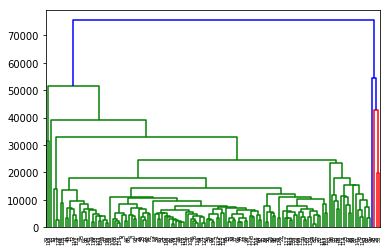

In [49]:
dendrogram(Z)

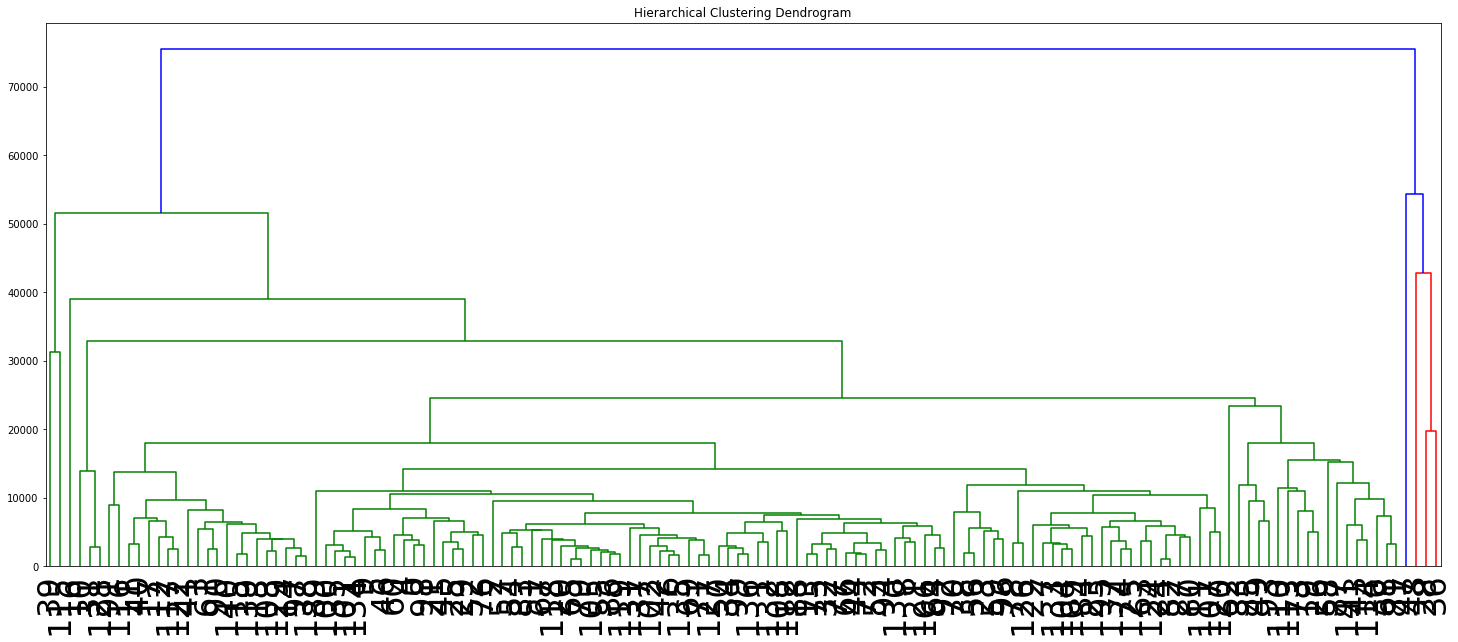

In [50]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, leaf_font_size = 32.)
plt.show()

In [51]:
from scipy.cluster.hierarchy import fcluster
k = 3
dend_clusters = fcluster(Z, k, criterion = 'maxclust')
dend_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [52]:
print((sum(d_retail.Fresh) - 16117 - 22925 - 44466 - 35942)/(142 - 4))
print((sum(d_retail.Milk) - 46197 - 73498 - 54259 - 38369)/(142 - 4))
print((sum(d_retail.Grocery) - 92780 - 32114 - 55571 - 59598)/(142 - 4))
print((sum(d_retail.Frozen) - 1026 - 987 - 7782 - 3254)/(142 - 4))
print((sum(d_retail.Detergents_Paper) - 40827 - 20070 - 24171 - 26701)/(142 - 4))
print((sum(d_retail.Delicassen) - 2944 - 903 - 6465 - 2017)/(142 - 4))

8296.840579710144
9488.550724637682
15056.391304347826
1605.9565217391305
6670.297101449275
1714.9202898550725


In [53]:
sales = [{'Fresh': 8297, 'Milk': 9489, 'Grocery': 15056, 'Frozen': 1606, 'Detergents_Paper': 6670, 
          'Delicassen': 1715}]
df = pd.DataFrame(sales)
df = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
df.rename(index = {0:'Cluster 4'}, inplace = True)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster 4,8297,9489,15056,1606,6670,1715


In [54]:
Cluster5 = d_retail[47:48]
Cluster5.rename(index = {85:'Cluster 5'}, inplace = True)
Cluster5

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster 5,16117,46197,92780,1026,40827,2944


In [55]:
leaves_list(Z)

array([ 39, 115,  16,  10,  31, 128,  91, 116,  11,  40,  17,  12, 117,
       122,  41,   3,  61,  90, 140,  15, 139,  18, 103, 129,  14,  97,
       138,  89, 100,  35, 101, 134,   9,   5,  46,  60,   4,   0,  98,
        21,  45,  25,  29,  52,  76,   2,  57,  54,  83,  51,  67, 118,
        20,  65,  79, 105,  55,  86, 119, 131,  37, 102,  42,   6, 135,
        69,  71, 127,  50,  34,  99, 136,   1, 132, 108, 112,  88,  13,
        75,  32,  77,  66,  44,  72,  53,  94, 130,   8, 121, 106,  64,
        92,  70,  38,  56,  23,  59,  96,  78, 126,  22,   7, 133, 104,
       109,  84, 123,  95, 137,  74, 125,  63, 124,  24,  82,  27,  80,
       111, 107, 120,  62,  33,  85,  49,  93, 110, 113,  73,  19,  26,
        58,  87, 141,  43, 114,  30,  68,  81,  47,  48,  28,  36],
      dtype=int32)

In [56]:
Cluster6a = d_retail[48:49]
Cluster6b = d_retail[28:29]
Cluster6c = d_retail[36:37]
Cluster6 = pd.concat([Cluster6a, Cluster6b, Cluster6c])
Cluster6.rename(index = {86:'Cluster 6', 47:'Cluster 6', 61:'Cluster 6'}, inplace = True)
Cluster6

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster 6,22925,73498,32114,987,20070,903
Cluster 6,44466,54259,55571,7782,24171,6465
Cluster 6,35942,38369,59598,3254,26701,2017


<b><font color="blue", size = 4>d)</font> kNN Clustering</b>: Use your results from the cluster analysis performed in a) or b) and create a short training set. Cluster your data using your training set on kNN. Explain your results.

<span style="background-color: #FFFF00">Your answer here</span>

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, p = 2)
d_catering_knn['Association'] = d_catering_knn['Association'].replace({1: 'Low spender', 2: 'Medium spender', 
                                                                      3: 'High Spender'})
knn.fit(d_catering_knn[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']], 
        d_catering_knn.Association)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [61]:
def Prediction():
    fresh = int(input('How much does this catering industry annually purchase fresh product from us:'))
    milk = int(input('How much does this catering industry annually purchase milk product from us:'))
    grocery = int(input('How much does this catering industry annually purchase grocery product from us:'))
    frozen = int(input('How much does this catering industry annually purchase frozen product from us:'))
    detergents_paper = int(input('How much does this catering industry annually purchase detergents and paper product from us:'))
    delicatessen = int(input('How much does this catering industry annually purchase delicatessen product from us:'))
    data_class = knn.predict(np.array([fresh, milk, grocery, frozen, detergents_paper, delicatessen]).
                             reshape(1, -1))[0]
    print('Prediction: this customer belongs to ', data_class)

In [62]:
Prediction()

How much does this catering industry annually purchase fresh product from us:60000
How much does this catering industry annually purchase milk product from us:40000
How much does this catering industry annually purchase grocery product from us:10000
How much does this catering industry annually purchase frozen product from us:2000
How much does this catering industry annually purchase detergents and paper product from us:200
How much does this catering industry annually purchase delicatessen product from us:900
Prediction: this customer belongs to  High Spender


<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 5:</b> Summary</blockquote> 

<b><font color="blue", size = 4>a)</font> Project Summary</b>: Write a few sentences about the result of this project. How can your stakeholder benefit from the results of your project? Which changes or adaptations can your stakehoders make now that he has your results?

<span style="background-color: #FFFF00">Your answer here</span>

- Now he knows only small part of the customers is clustered as medium and high spenders. Especially for retail customers, only 4 of them are not low spenders.<br>
So for retail customers, those low spenders should be his target customer. Since one third of catering industry is high and medium spender, and they acquire significant more than normal, so high and medium spender in catering industry should be his target customers.<br><br>
- From this project he also knows there are high correlations for certain product types’ purchase amount: in retail channel people who purchase Detergents and paper would also likely to buy milk and grocery products.<br>
So my recommendation for you is to put correlated products in a near section / area so it make more convenience for retail customers to shop, which are Milk, grocery, detergents and paper, especially high spenders in retail purchase more on Milk, grocery, detergents and paper. <br>
<br>
- Finally he knows in catering channel, high spender clients spend a lot more on Fresh product. <br>
So fresh need to be always sufficient for them since catering business requires a lot of food supplies.

<b><font color="blue", size = 4>b)</font> Project Report</b>: Write a formal report to your stakeholders with the summary of your report 

<span style="background-color: #FFFF00">Your answer here</span>

Dear Owner of the Wholesale Distributor:<Br>
<Br>
Based on your request, I have researched and analyzed the dataset you gave me. It includes the annual spending in monetary units on diverse product categories from different channels and regions.<Br>
<Br>
Channels include Horeca(Catering Industry) and Retail. There are 298 customers from Catering industry and 142 customers from retail side, which indicates that our major customers are from catering business. For regions, they are categorized into 3 groups: one group from Lisbon, one from Oporto and all other regions’ customers are categorized into Other regions. The rest six columns of data are numerical data are they represents the annual spending in monetary units on different product types including Fresh, Milk, Grocery, Frozen, Detergents and paper and Delicatessen. <Br>
<Br>
I understand your goal is to know, according to their shopping habits, how could all your customers be categorized into different types. So that it enables you to target at different groups of customers using specific approach to maximum the profit. I will categorize all wholesale customers into different groups based on their spending behaviors. The results will help you know better about customers' shopping behavior to make marketing strategies and decisions based on that.<Br>
<Br>
After testing and clustering I found that the majority of the customers are low spenders. Only small part of the customers is clustered as medium and high spenders. Especially for retail customers, only 4 of them are not low spenders. I also found there are high correlations for certain product types’ purchase amount: in retail channel people who purchase Detergents and paper would also likely to buy milk and grocery products. In catering channel, high spender clients spend a lot more on Fresh product. <Br>
<Br>
My recommendation for you is to put correlated products in a near section / area so it make more convenience for retail customers to shop, which are Milk, grocery, detergents and paper, especially high spenders in retail purchase more on Milk, grocery, detergents and paper. High Spenders in Catering purchase more on Fresh, So fresh need to be always sufficient for them since catering business requires a lot of food supplies. <Br>
<Br>
Thank you for your business. <Br>
<Br>
Gina